The organic data set having 10 attributes, 2 rows are merged into single row, We have done the feature processing.

In [ ]:
#load the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,KBinsDiscretizer,OneHotEncoder,StandardScaler
 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
 
from sklearn.metrics import confusion_matrix,recall_score
from sklearn.compose import ColumnTransformer
 
from scipy import stats
 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ORGANIC_7ATT.xlsx to ORGANIC_7ATT (2).xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['ORGANIC_7ATT.xlsx']))
df.head()

,book,λ1,λ2,n1,n2,k1,k2
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.196,1.209,0.6096,0.6501
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.228,1.235,0.7096,0.7315
2,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,1.417,1.420,0.4472,0.4551
3,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,1.440,1.440,0.8090,0.8090
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10120,1.442,1.446,0.3024,0.4768


In [ ]:
df.isnull().sum()

book    0
λ1      0
λ2      0
n1      0
n2      0
k1      0
k2      0
dtype: int64

In [ ]:
df['λ_binned'] = pd.cut(df['λ1'], [0, 1.5, 4.0,np.inf],labels=['UV','mid_IR','IR'],)
df.head()

,book,λ1,λ2,n1,n2,k1,k2,λ_binned
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.196,1.209,0.6096,0.6501,UV
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.228,1.235,0.7096,0.7315,UV
2,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,1.417,1.420,0.4472,0.4551,UV
3,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,1.440,1.440,0.8090,0.8090,UV
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10120,1.442,1.446,0.3024,0.4768,UV


In [ ]:
new_df = df.copy()
new_df.drop('λ1',axis=1,inplace=True)
y = new_df['book']
x = new_df.drop('book',axis=1)

In [ ]:
#split the data for training and testing
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42,stratify=x.λ_binned)

In [ ]:
cat_features = ['λ_binned']
numeric_features = ['n1','n2','k1','k2']

In [ ]:
#preprocessing and training pipeline with our own bins

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler())
                                      ])

categorical_transformer = Pipeline(steps=[
                                          ('onehot',OneHotEncoder())
                                          ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features),   #apply the transformation
                  ('category',categorical_transformer,cat_features)
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

Applied the Random Forest Algorithm

In [ ]:
rf_model_bin_one = pipeline.fit(x_train, y_train)
print (rf_model_bin_one)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['n1', 'n2', 'k1', 'k2']),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['λ_binned'])])),
                ('regressor', RandomForestClassifier())])


In [ ]:
print(f'Training accuracy {rf_model_bin_one.score(x_train,y_train)}')
print(f'Test accuracy {rf_model_bin_one.score(x_test,y_test)}')

Training accuracy 0.9912343665035346
Test accuracy 0.8187928221859706


In [ ]:
pred = rf_model_bin_one.predict(x_test)

In [ ]:
pred

array(['oxathiane', 'poly(N-isopropylacrylamide)', 'styrene', ...,
       'toluene', 'dimethyl_methylphosphonate', 'toluene'], dtype=object)

In [ ]:
x_test.head()

,λ2,n1,n2,k1,k2,λ_binned
73114,4.068510,1.490490,1.490490,0.000576,0.000582,IR
76042,0.809866,1.496943,1.496917,0.001835,0.001832,UV
104133,3.155490,1.511100,1.511080,0.000432,0.000435,mid_IR
78095,1.840000,1.474270,1.474620,0.000020,0.000020,mid_IR
102234,1.999900,1.515780,1.515780,0.000038,0.000039,mid_IR


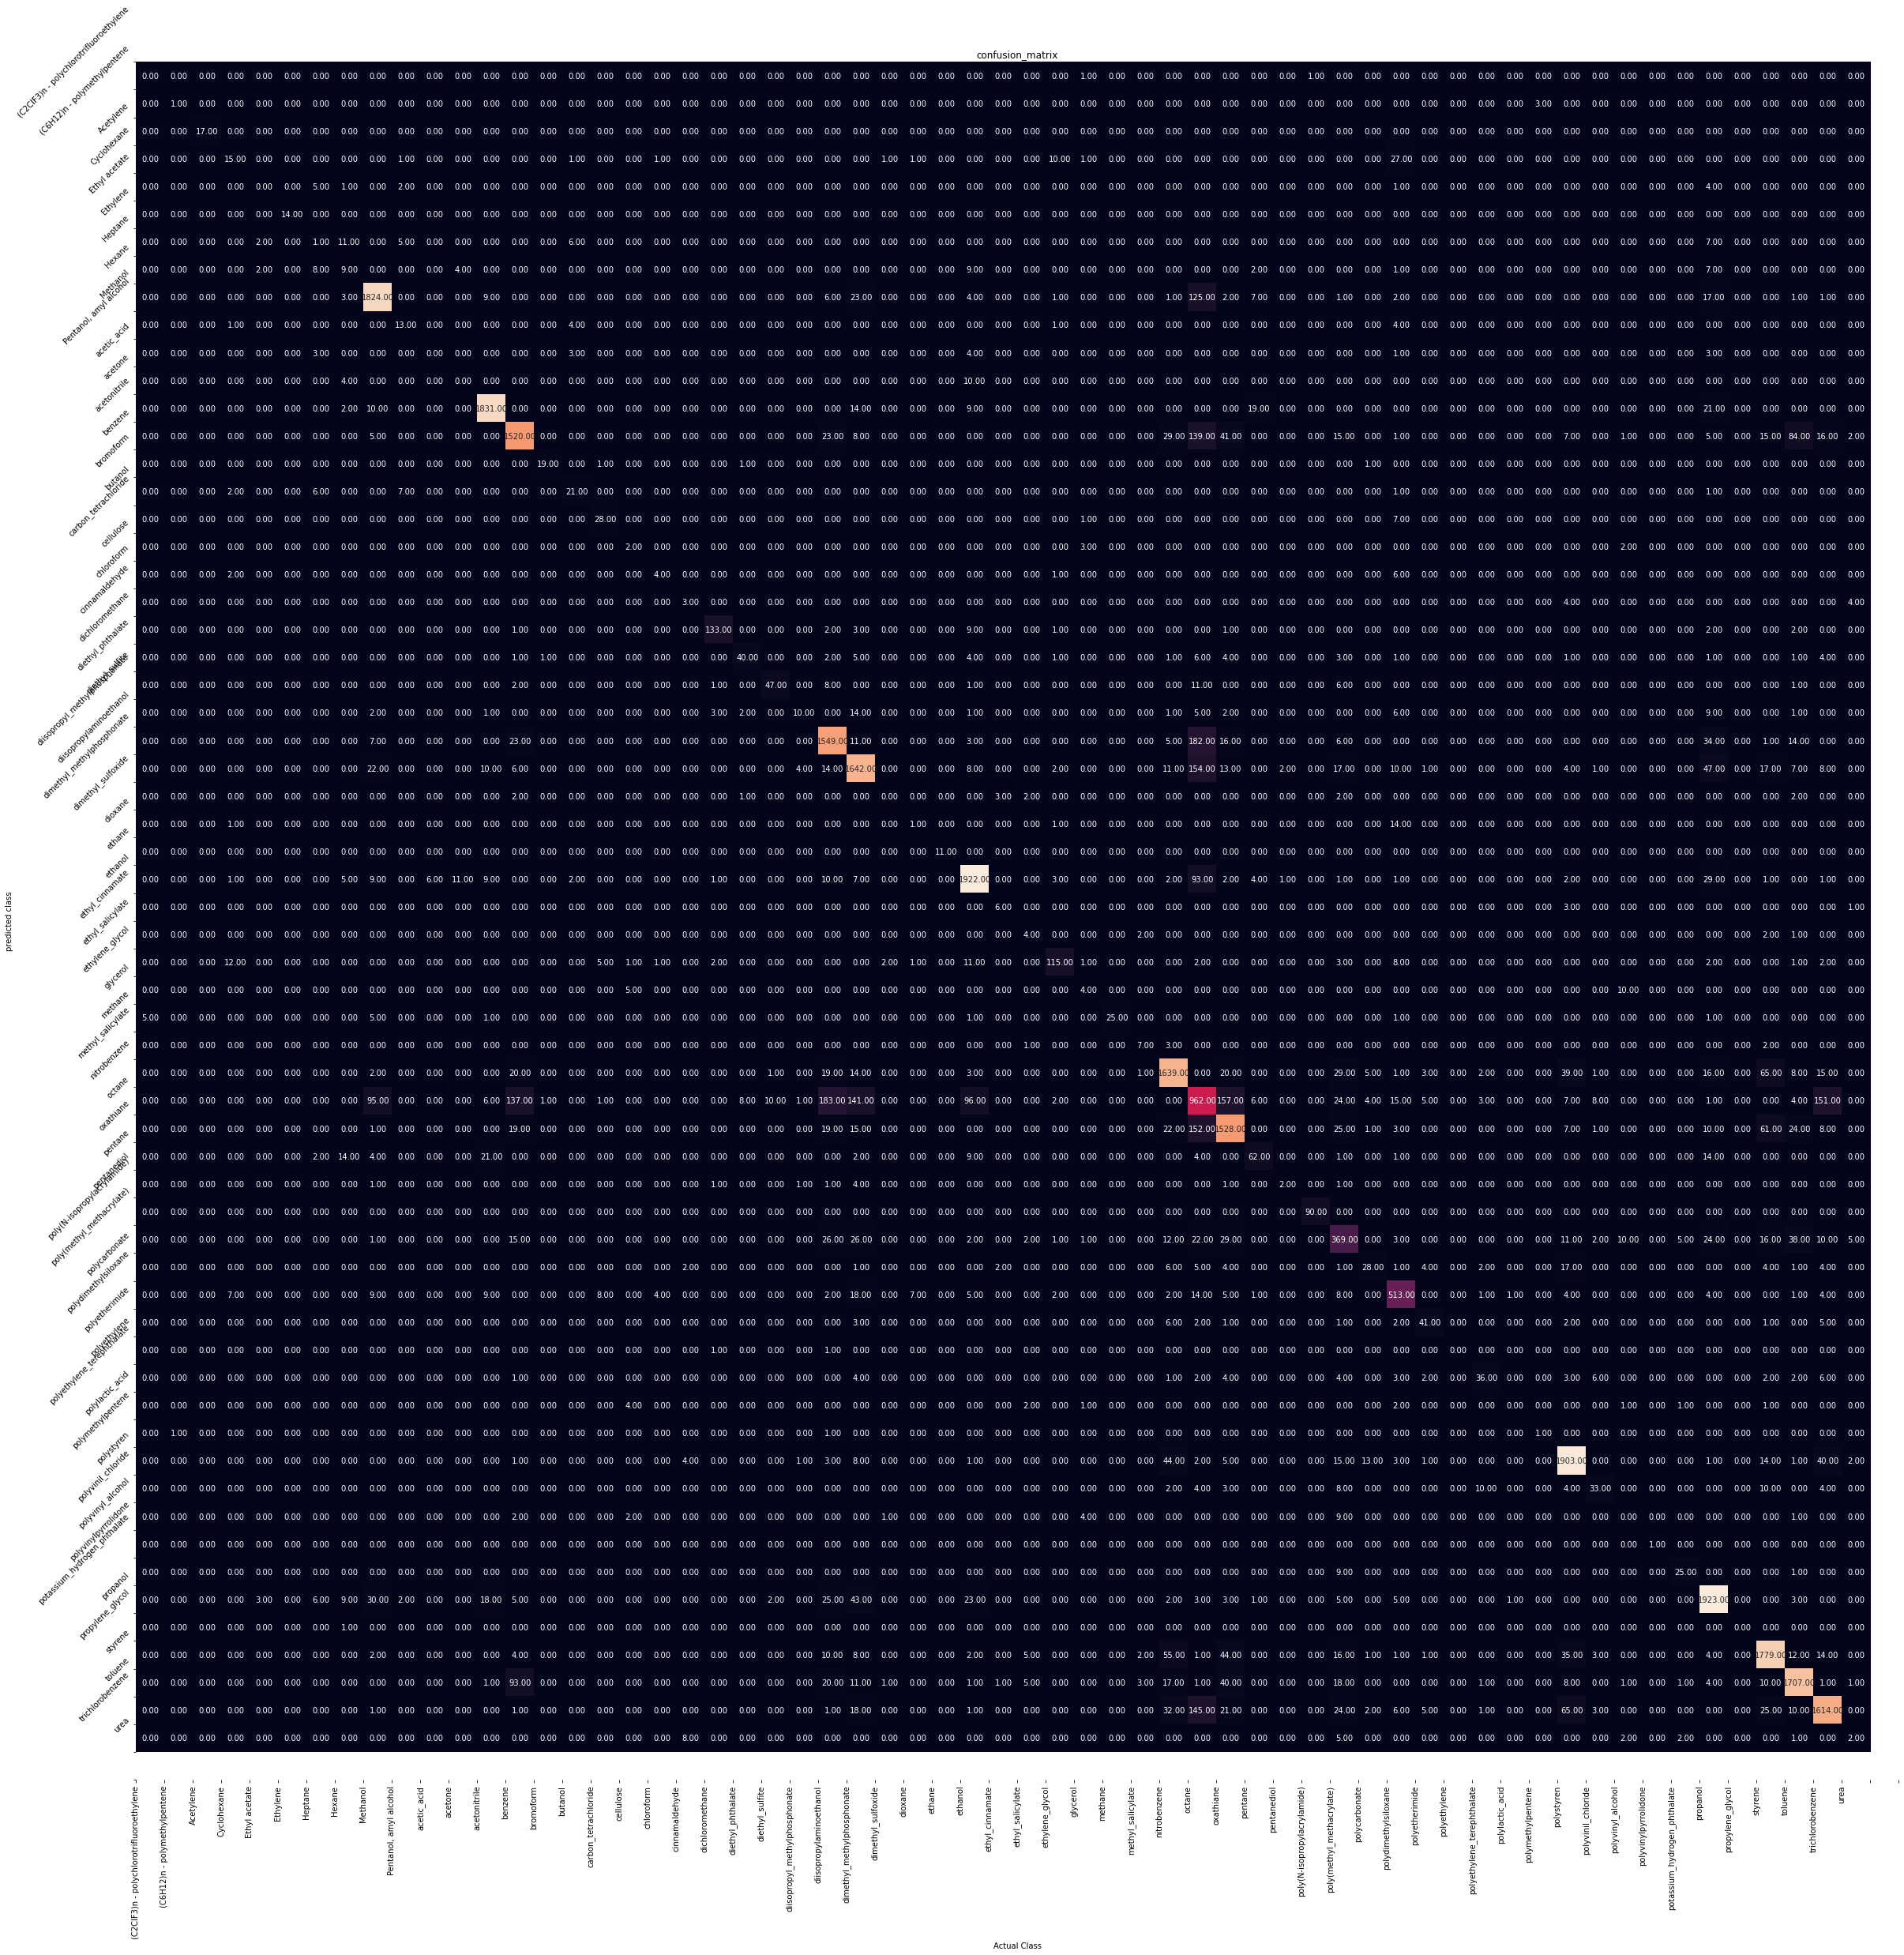

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
cm = confusion_matrix(y_test,pred,labels=list(df.book.unique()))
sns.heatmap(cm,annot=True,fmt='.2f',cbar=False)
plt.xticks(range(0,63),labels=list(df.book.unique()),rotation=90)
plt.yticks(range(0,63),labels=list(df.book.unique()),rotation=45)
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Actual Class')
plt.ylabel('predicted class')
plt.show()

Here based on the λ values, the dataset is divided into 3 bins. They are UV, MID_IR, IR

In [ ]:
UV = x_test[x_test.λ_binned=='UV']
UV_y = y_test[x_test.λ_binned=='UV']
MID_IR = x_test[x_test.λ_binned=='mid_IR']
MID_IR_y = y_test[x_test.λ_binned=='mid_IR']
IR = x_test[x_test.λ_binned=='IR']
IR_y = y_test[x_test.λ_binned=='IR']

TRAINING ACCURACY

In [ ]:
labls = ['UV','mid_IR','IR']
tr_scores = []

for l in labls:
  train_x = x_train[x_train.λ_binned==l]
  train_y = y_train[x_train.λ_binned==l]
 
  tr_scores.append(rf_model_bin_one.score(train_x,train_y))

In [ ]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', tr_scores[i])

UV : 1.0
mid_IR : 0.98440791416478
IR : 0.9994390126622856


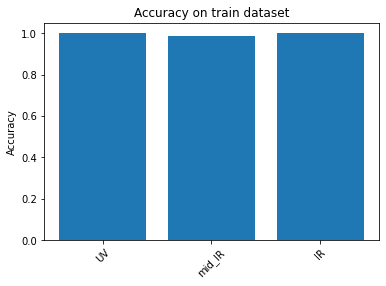

In [ ]:
labls = ['UV','mid_IR','IR']
plt.bar(labls,tr_scores)
plt.title('Accuracy on train dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

TEST ACCURACY

In [ ]:
labls = ['UV','mid_IR','IR']
ts_scores = []

for l in labls:
  test_x = x_test[x_test.λ_binned==l]
  test_y = y_test[x_test.λ_binned==l]
 
  ts_scores.append(rf_model_bin_one.score(test_x,test_y))


In [ ]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', ts_scores[i])

UV : 0.8818518518518519
mid_IR : 0.853286870238025
IR : 0.7076571703329727


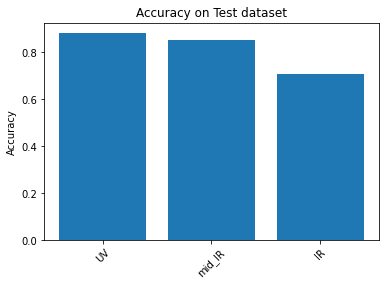

In [ ]:
labls = ['UV','mid_IR','IR']
plt.bar(labls,ts_scores)
plt.title('Accuracy on Test dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

PREDICTING THE LABELS

In [ ]:
print(UV[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n\n',UV_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n\n',rf_model_bin_one.predict(UV[10:12]))

            λ2      n1      n2        k1        k2 λ_binned
26307  1.29130  1.4287  1.4287  0.000028  0.000028       UV
46874  1.38403  1.3481  1.3481  0.000044  0.000044       UV
------------------------------------------------------------------------------------------

Actual Class

 26307    diisopropylaminoethanol
46874                    ethanol
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class

 ['diisopropylaminoethanol' 'ethanol']


In [ ]:
print(MID_IR[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n\n',MID_IR_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n\n',rf_model_bin_one.predict(MID_IR[10:12]))

            λ2       n1       n2        k1        k2 λ_binned
30971  3.08004  1.42779  1.42779  0.012779  0.012742   mid_IR
60506  2.87138  1.29094  1.29096  0.000385  0.028298   mid_IR
------------------------------------------------------------------------------------------

Actual Class

 30971    diisopropylaminoethanol
60506                     octane
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class

 ['octane' 'octane']


In [ ]:
print(IR[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n',IR_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n',rf_model_bin_one.predict(IR[10:12]))

            λ2       n1       n2        k1        k2 λ_binned
14670  4.46433  1.35305  1.35244  0.006700  0.006210       IR
40972  9.98129  1.70545  1.70072  0.067691  0.065565       IR
------------------------------------------------------------------------------------------

Actual Class
 14670                  acetonitrile
40972    dimethyl_methylphosphonate
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class
 ['acetonitrile' 'trichlorobenzene']


In [ ]:
df.columns

Index(['book', 'λ1', 'λ2', 'n1', 'n2', 'k1', 'k2', 'λ_binned'], dtype='object')

In [ ]:
sec_df = df.drop('λ_binned',axis=1).copy()
sec_df.head()

,book,λ1,λ2,n1,n2,k1,k2
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.196,1.209,0.6096,0.6501
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.228,1.235,0.7096,0.7315
2,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,1.417,1.420,0.4472,0.4551
3,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,1.440,1.440,0.8090,0.8090
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10120,1.442,1.446,0.3024,0.4768


### Second custom bins 
Here based on the λ values, the dataset is divided into 5 bins, they are UV, Visible Light, Near_IR, IR, Far_IR

In [ ]:
sec_df['λ_binned'] = pd.cut(sec_df['λ1'], [-np.inf,0.4,0.75,1.5,4.0,np.inf],
                            labels=['UV','visible_light','near_IR','IR_rays','Far_IR_Rays'])
sec_df.head()

,book,λ1,λ2,n1,n2,k1,k2,λ_binned
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.196,1.209,0.6096,0.6501,UV
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.228,1.235,0.7096,0.7315,UV
2,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,1.417,1.420,0.4472,0.4551,UV
3,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,1.440,1.440,0.8090,0.8090,UV
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10120,1.442,1.446,0.3024,0.4768,UV


In [ ]:
sec_df.drop('λ1',axis=1,inplace=True)
y = sec_df['book']
x = sec_df.drop('book',axis=1)

In [ ]:
#split the data for training and testing
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42,stratify=x.λ_binned)

In [ ]:
#preprocessing and training pipeline with our own bins

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler())
                                      ])

categorical_transformer = Pipeline(steps=[
                                          ('onehot',OneHotEncoder())
                                          ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features),   #apply the transformation
                  ('category',categorical_transformer,cat_features)
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [78]:
rf_model_bin_two = pipeline.fit(x_train, y_train)
print (rf_model_bin_two)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['n1', 'n2', 'k1', 'k2'])])),
                ('regressor', RandomForestClassifier())])


In [79]:
print(f'Training accuracy {rf_model_bin_two.score(x_train,y_train)}')
print(f'Test accuracy {rf_model_bin_two.score(x_test,y_test)}')

Training accuracy 0.9860358890701468
Test accuracy 0.8034257748776509


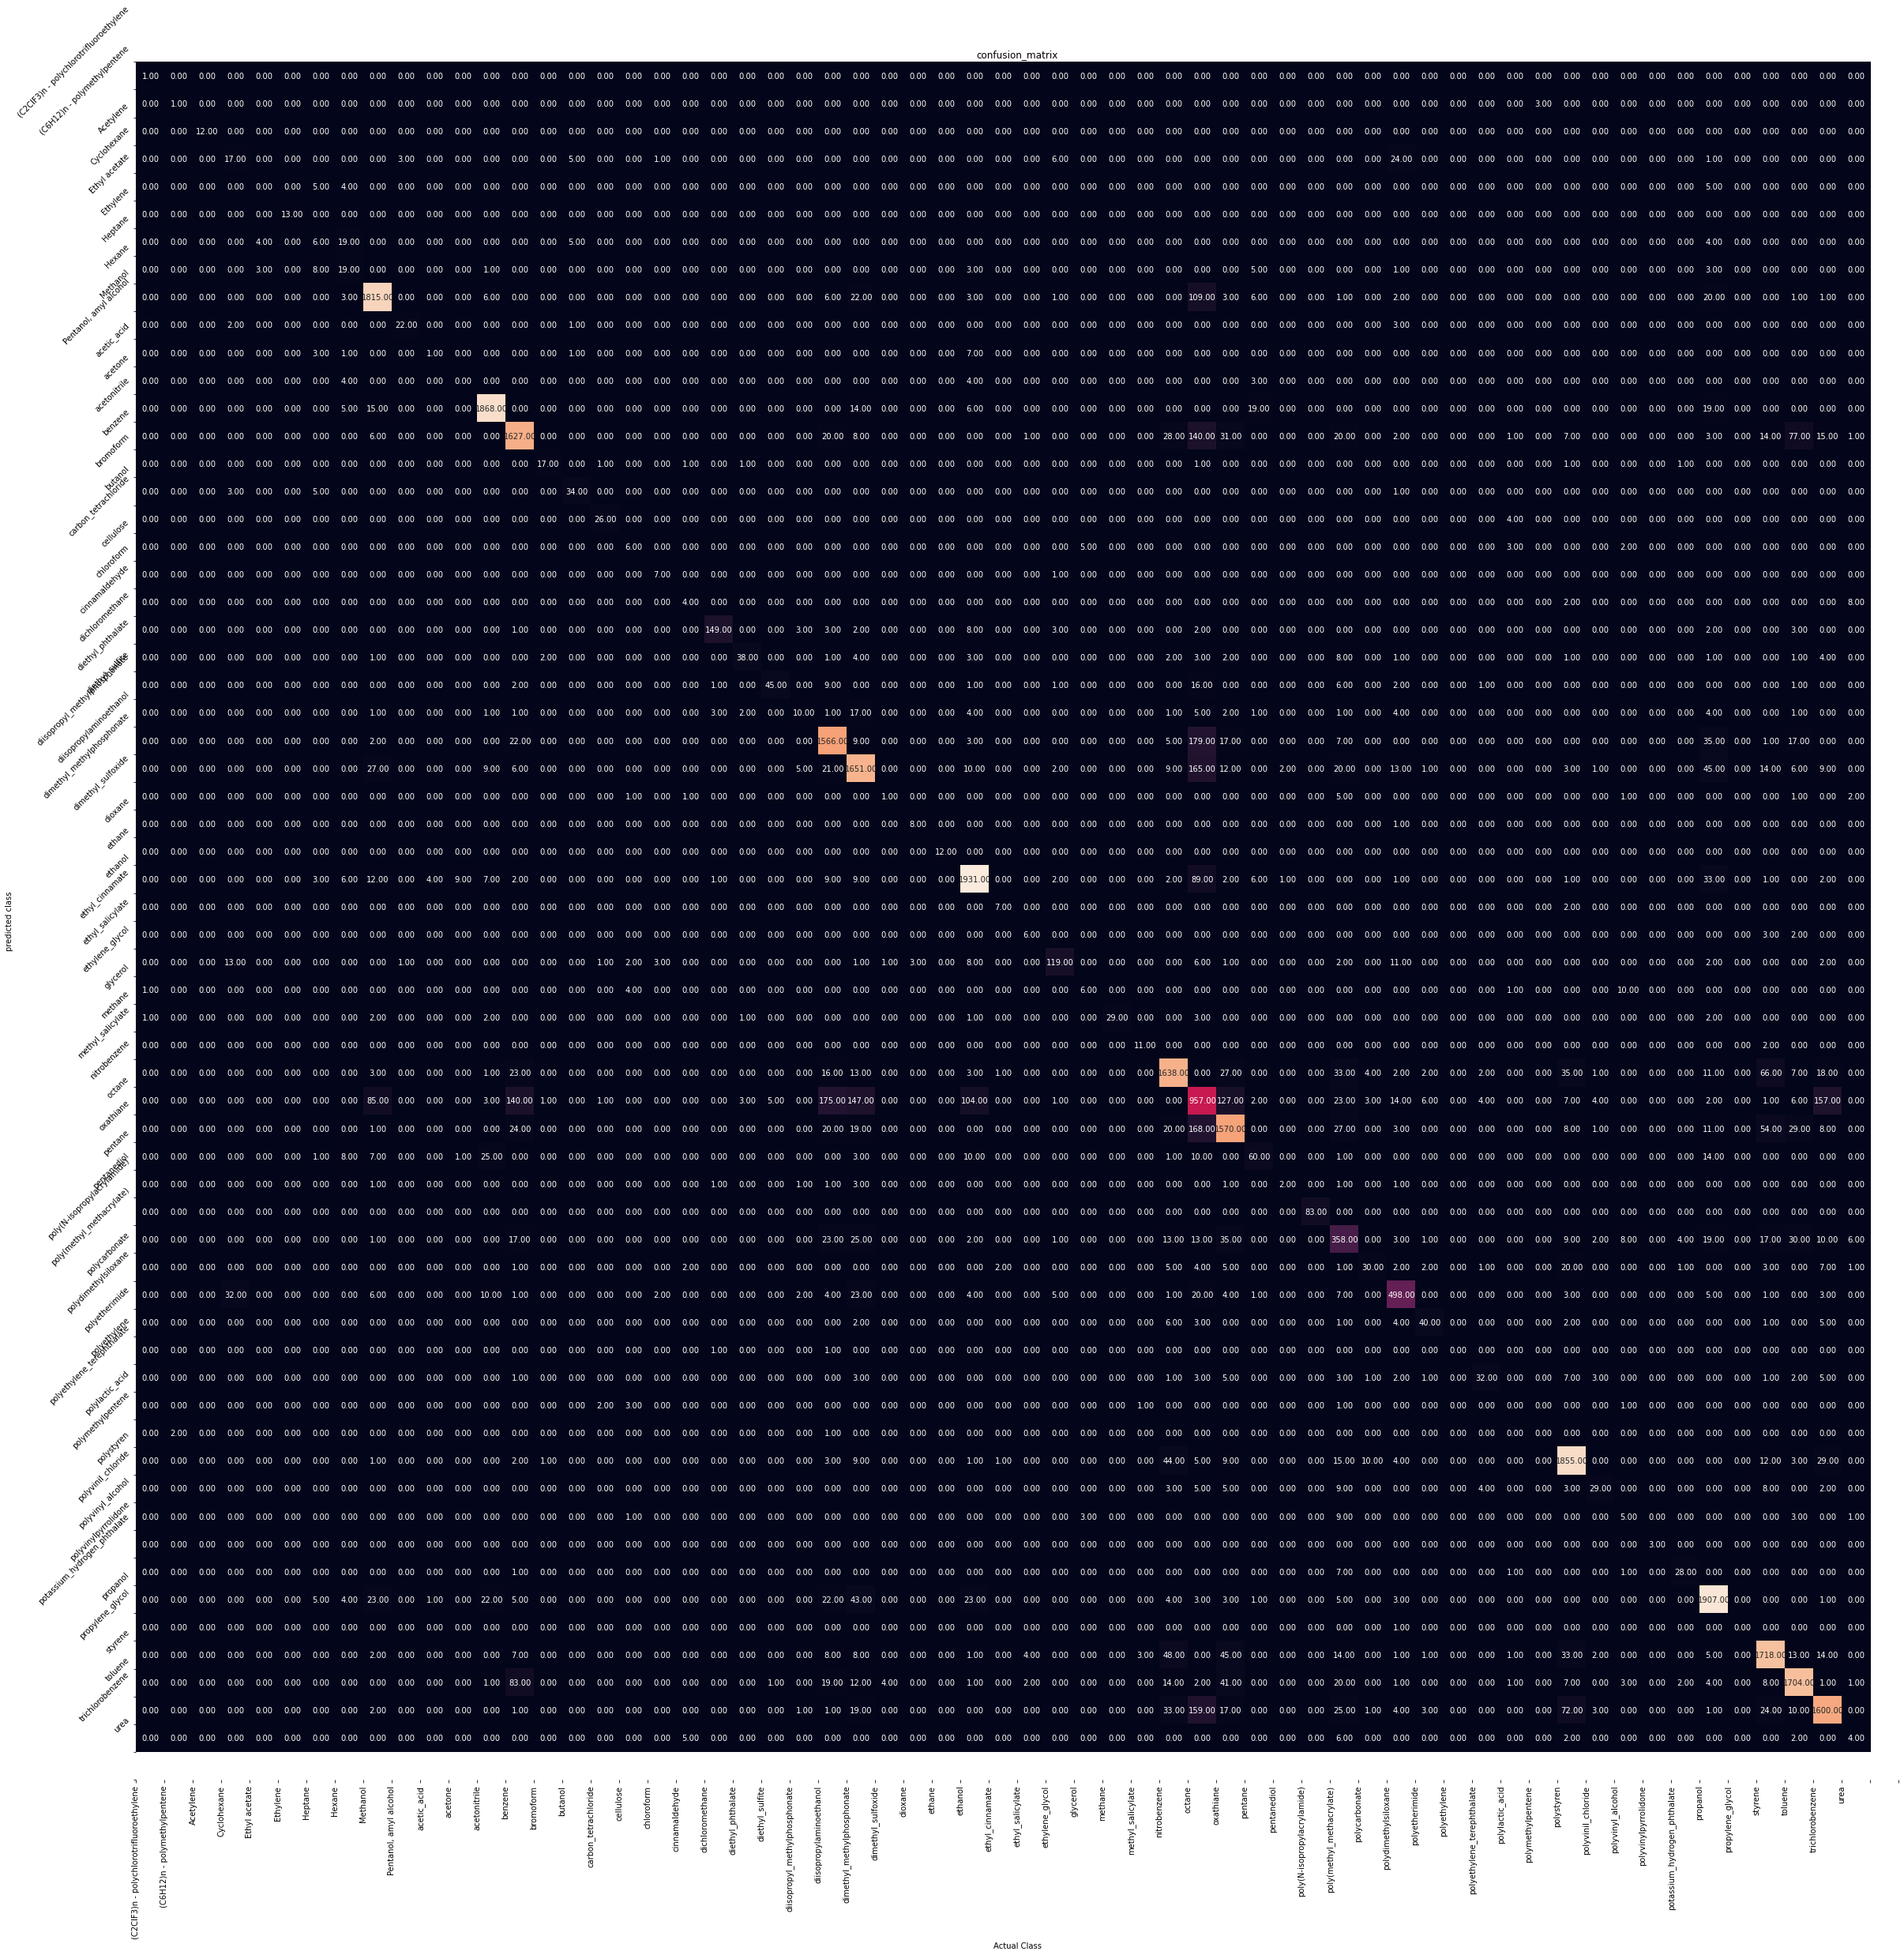

In [ ]:
pred = rf_model_bin_two.predict(x_test)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
cm = confusion_matrix(y_test,pred,labels=list(df.book.unique()))
sns.heatmap(cm,annot=True,fmt='.2f',cbar=False)
plt.xticks(range(0,63),labels=list(df.book.unique()),rotation=90)
plt.yticks(range(0,63),labels=list(df.book.unique()),rotation=45)
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Actual Class')
plt.ylabel('predicted class')
plt.show()

In [ ]:
UV = x_test[x_test.λ_binned== 'UV']
UV_y = y_test[x_test.λ_binned== 'UV']
Visible = x_test[x_test.λ_binned== "Visible"]
Visible_y = y_test[x_test.λ_binned == "Visible"]
Near_IR = x_test[x_test.λ_binned== 'Near_IR']
Near_IR_y = y_test[x_test.λ_binned== 'Near_IR']
IR = x_test[x_test.λ_binned== 'IR']
IR_y = y_test[x_test.λ_binned== 'IR']
Far_IR = x_test[x_test.λ_binned== 'Far_IR']
Far_IR_y = y_test[x_test.λ_binned== 'Far_IR']

TRAINING ACCURACY

In [ ]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
tr_scores = []

for l in labls:
  train_x = x_train[x_train.λ_binned==l]
  train_y = y_train[x_train.λ_binned==l]
 
  tr_scores.append(rf_model_bin_two.score(test_x,test_y))

In [ ]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', tr_scores[i])

UV : 0.5349462365591398
Far_IR_Rays : 0.5349462365591398
IR_rays : 0.5349462365591398
near_IR : 0.5349462365591398
visible_light : 0.5349462365591398


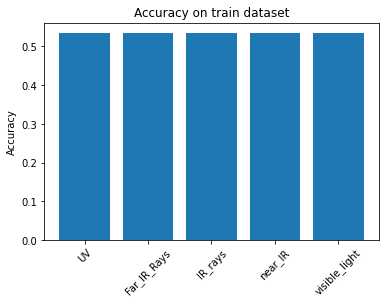

In [ ]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
plt.bar(labls,tr_scores)
plt.title('Accuracy on train dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

TEST ACCURACY

In [ ]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
ts_scores = []

for l in labls:
  test_x = x_test[x_test.λ_binned==l]
  test_y = y_test[x_test.λ_binned==l]
 
  ts_scores.append(rf_model_bin_two.score(test_x,test_y))

In [ ]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', ts_scores[i])

UV : 0.5575221238938053
Far_IR_Rays : 0.7081379973554514
IR_rays : 0.8536412497785127
near_IR : 0.9792325056433409
visible_light : 0.5349462365591398


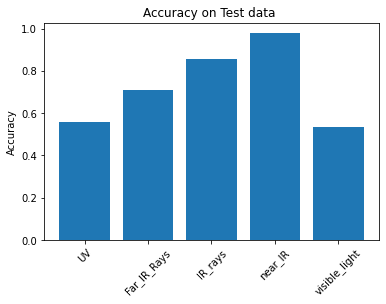

In [ ]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
plt.bar(labls,ts_scores)
plt.title('Accuracy on Test data ')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(UV[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n\n',UV_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n\n',rf_model_bin_two.predict(UV[10:12]))

             λ2        n1        n2            k1            k2 λ_binned
739    0.279300  1.419749  1.417801  0.000000e+00  0.000000e+00       UV
98701  0.389203  1.391610  1.391310  1.567000e-07  1.511890e-07       UV
------------------------------------------------------------------------------------------

Actual Class

 739        Hexane
98701    propanol
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class

 ['propanol' 'propanol']


### rounding off

In [ ]:
df.head()

,book,λ1,λ2,n1,n2,k1,k2,λ_binned
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.196,1.209,0.6096,0.6501,UV
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.228,1.235,0.7096,0.7315,UV
2,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,1.417,1.420,0.4472,0.4551,UV
3,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,1.440,1.440,0.8090,0.8090,UV
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10120,1.442,1.446,0.3024,0.4768,UV


In [ ]:
new_df = df.copy()
new_df.drop('λ_binned',axis=1,inplace=True)

In [ ]:
#preprocessing and training pipeline with our own bins

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler())
                                      ])


preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features),   #apply the transformation
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [ ]:
#split the data for training and testing

acc_tr = []
acc_ts = []

recall = []

round_place = [1,2,3,4,5]

for r in round_place:
  y = new_df['book']
  x = new_df.drop('book',axis=1).round(r)   #rounding off
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)
  rf_model = pipeline.fit(x_train,y_train)
  acc_tr.append(rf_model.score(x_train,y_train))
  acc_ts.append(rf_model.score(x_test,y_test))

  pred = rf_model.predict(x_test)

  recall.append(recall_score(y_test,pred,average='weighted'))

In [ ]:
acc_tr,acc_ts,recall

([0.26010875475802064,
  0.6492985318107667,
  0.8523327895595433,
  0.9592930940728657,
  0.9860467645459489],
 [0.2591517128874388,
  0.6355301794453507,
  0.7687438825448614,
  0.8094942903752039,
  0.8024469820554649],
 [0.2591517128874388,
  0.6355301794453507,
  0.7687438825448614,
  0.8094942903752039,
  0.8024469820554649])

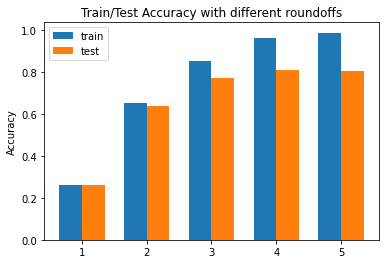

In [ ]:
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
plt.title('Train/Test Accuracy with different roundoffs')
X_axis = np.arange(len(round_place))
ax.bar(X_axis - width/2,acc_tr,width,label='train')
ax.bar(X_axis + width/2,acc_ts,width,label='test')
plt.xticks(X_axis,round_place)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

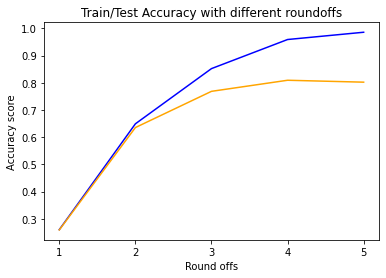

In [ ]:
plt.title('Train/Test Accuracy with different roundoffs')
plt.plot(X_axis,acc_tr,color='b',label ='train')
plt.plot(X_axis,acc_ts,color='orange',label='test')
plt.xlabel('Round offs')
plt.ylabel('Accuracy score')
plt.xticks(range(len(round_place)),round_place)
plt.show()

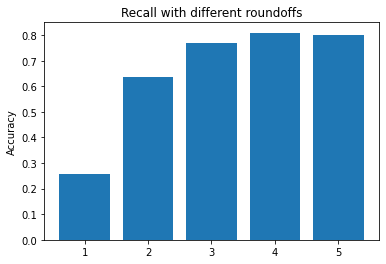

In [ ]:
plt.bar(round_place,recall)
plt.title('Recall with different roundoffs')
plt.ylabel('Accuracy')
plt.show()